In [31]:
import opendatasets as od

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('./genre-classification-dataset-imdb/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./genre-classification-dataset-imdb/Genre Classification Dataset/test_data_solution.txt
./genre-classification-dataset-imdb/Genre Classification Dataset/train_data.txt
./genre-classification-dataset-imdb/Genre Classification Dataset/test_data.txt
./genre-classification-dataset-imdb/Genre Classification Dataset/description.txt


In [13]:
od.download("https://www.kaggle.com/datasets/hijest/genre-classification-dataset-imdb")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  siddantakc


Your Kaggle Key:

  ········


Dataset URL: https://www.kaggle.com/datasets/hijest/genre-classification-dataset-imdb


100%|██████████████████████████████████████| 41.7M/41.7M [00:01<00:00, 31.4MB/s]


In [33]:
columns_train = ['ID','TITLE','GENRE','DESCRIPTION']
train_df = pd.read_csv('./genre-classification-dataset-imdb/Genre Classification Dataset/train_data.txt',names = columns_train,sep=':::')
train_df.head(5)

,ID,TITLE,GENRE,DESCRIPTION
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [35]:
column_test = ['ID','TITLE','DESCRIPTION']
test_df = pd.read_csv('./genre-classification-dataset-imdb/Genre Classification Dataset/test_data.txt',names = column_test,sep=':::')
test_df.head(5)

,ID,TITLE,DESCRIPTION
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


In [39]:
test_sol_df = pd.read_csv('./genre-classification-dataset-imdb/Genre Classification Dataset/test_data_solution.txt',names = columns_train,sep=':::')
test_sol_df.head(5)

,ID,TITLE,GENRE,DESCRIPTION
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


In [41]:
# total number of genres
genres = train_df['GENRE'].unique()
print("There are total ",len(genres), "genres in the dataset.")
print(genres)

There are total  27 genres in the dataset.
[' drama ' ' thriller ' ' adult ' ' documentary ' ' comedy ' ' crime '
 ' reality-tv ' ' horror ' ' sport ' ' animation ' ' action ' ' fantasy '
 ' short ' ' sci-fi ' ' music ' ' adventure ' ' talk-show ' ' western '
 ' family ' ' mystery ' ' history ' ' news ' ' biography ' ' romance '
 ' game-show ' ' musical ' ' war ']


In [43]:
# Removing Duplicates from the description column
train_df = train_df.drop(train_df[train_df['DESCRIPTION'].duplicated()].index)

#Removing Extra Spaces from the GENRE
train_df['GENRE'] = train_df['GENRE'].str.strip()
test_sol_df['GENRE'] = test_sol_df['GENRE'].str.strip()

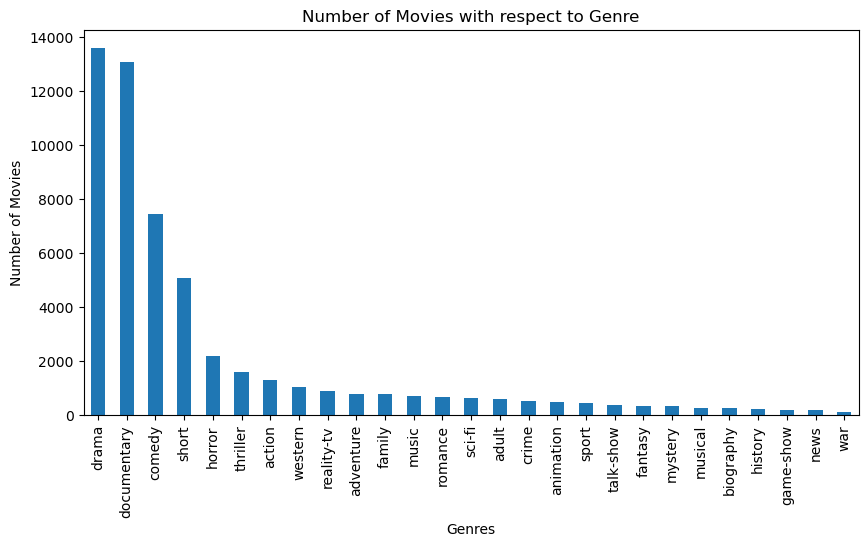

In [45]:
plt.figure(figsize=(10,5))
train_df['GENRE'].value_counts().plot(kind='bar')
plt.ylabel("Number of Movies")
plt.xlabel("Genres")
plt.title("Number of Movies with respect to Genre")
plt.show()

## Data Cleaning

In [57]:
import re
import spacy

nlp = spacy.load("en_core_web_sm")
def clean_text(text):
    text = text.lower() #text to lowercase
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^\w\s\-]', '', text).strip() # remove special characters and numbers
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct] # tokens and stop words removal
    return " ".join(tokens)

In [60]:
train_df['clean_desc'] = train_df['DESCRIPTION'].apply(clean_text)
test_df['clean_desc'] = test_df['DESCRIPTION'].apply(clean_text)

In [61]:
train_df

,ID,TITLE,GENRE,DESCRIPTION,clean_desc
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,listen conversation doctor parent 10 year old ...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,brother sister past incestuous relationship cu...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bus empty student field trip museum natural hi...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemployed father end meet edith twin sis...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,film title refer un recovered body ground zero...
...,...,...,...,...,...
54209,54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...,short live nbc live sitcom center bonino world...
54210,54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...,generation exploitation sister kapa bay sorori...
54211,54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g...",ze bestaan echt stand comedy grow face fear fr...
54212,54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...,walter vivian live country difficult time keep...


In [62]:
test_df

,ID,TITLE,DESCRIPTION,clean_desc
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",lr brane love life car apartment job especiall...
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",spain march 1964 quico naughty child belong we...
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,year life albin family shepherd north transylv...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",father die not speak brother 10 year cancer di...
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,know internationally martial art superstar bru...
...,...,...,...,...
54195,54196,"""Tales of Light & Dark"" (2013)","Covering multiple genres, Tales of Light & Da...",cover multiple genre tale light dark antholo...
54196,54197,Der letzte Mohikaner (1965),As Alice and Cora Munro attempt to find their...,alice cora munro attempt find father british o...
54197,54198,Oliver Twink (2007),A movie 169 years in the making. Oliver Twist...,movie 169 year making oliver twist artful dodg...
54198,54199,Slipstream (1973),"Popular, but mysterious rock D.J Mike Mallard...",popular mysterious rock dj mike mallard askew ...


## TF-IDF Vectorizer

In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [77]:
X_train = train_df['clean_desc']
y_train = train_df['GENRE']
X_test = test_df['clean_desc']
y_test = test_sol_df['GENRE']
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)

In [79]:
X_train_tfidf=tfidf.fit_transform(X_train)
X_test_tfidf=tfidf.fit_transform(X_test)

In [81]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(X_train_tfidf.toarray(),y_train,test_size=0.2,random_state=42)

## Models training for Unbalanced Dataset

In [95]:
from sklearn.metrics import accuracy_score, classification_report,precision_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [114]:
models = {
    "GaussianNB":  GaussianNB(),
    "DecisionTree": DecisionTreeClassifier(),
    "RandomForest":  RandomForestClassifier(n_estimators=100, random_state=0),
    "LogisticRegression": LogisticRegression(max_iter=1000)
}

In [116]:
def models_train(X_train,y_train,X_val,y_val,X_test_,y_test_,models):
    results = []
    highest_acc = 0
    selected_model = {}
    for name,model in models.items():
        print("Training....",name,"model")
        model.fit(X_train,y_train)
        train_score = model.score(X_train,y_train)
        y_pred_val = model.predict(X_val)
        precision_val = precision_score(y_val,y_pred_val,average='weighted')
        recall_val = recall_score(y_val,y_pred_val,average='weighted')
        f1_val = f1_score(y_val,y_pred_val,average='weighted')
        acc_val = accuracy_score(y_val,y_pred_val)
        y_pred_test = model.predict(X_test_)
        acc_test = accuracy_score(y_test_,y_pred_test)
        # precision_test = precision_score(y_test_,y_pred_test,average='weighted')
        # recall_test = recall_score(y_test_,y_pred_test,average='weighted')
        # f1_test = f1_score(y_test_,y_pred_test,average='weighted')
        # print(acc_test,'acc_test')
        if acc_val > highest_acc:
            selected_model[name] = model
        results.append({"Model":name,"Train Score":train_score,"Val Acc":acc_val,"Precision Val":precision_val,"Recall Val":recall_val,
                        "F1 Score Val":f1_val,"Test Acc":acc_test})
        print("Completed\n")
    return results,selected_model

In [118]:
result_unbalance,selected_model = models_train(X_train,y_train,X_val,y_val,X_test_tfidf.toarray(),y_test,models)
result_unbalance = pd.DataFrame(result_unbalance)
result_unbalance

Training.... GaussianNB model
Completed

Training.... DecisionTree model
Completed

Training.... RandomForest model
Completed

Training.... LogisticRegression model
Completed



,Model,Train Score,Val Acc,Precision Val,Recall Val,F1 Score Val,Test Acc
0,GaussianNB,0.416266,0.226197,0.382600,0.226197,0.262110,0.216347
1,DecisionTree,0.999861,0.368090,0.347371,0.368090,0.356071,0.172011
2,RandomForest,0.999861,0.496672,0.480000,0.496672,0.416529,0.246181
3,LogisticRegression,0.671351,0.585598,0.569253,0.585598,0.547908,0.259170
